In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

import warnings

warnings.filterwarnings("ignore")

colors = sns.color_palette("Accent")

In [7]:
# Load data
df = pd.read_csv("data_with_clusters.csv")

In [8]:
df

,cutomer_id,gender,age,annual_income,spending_score,cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


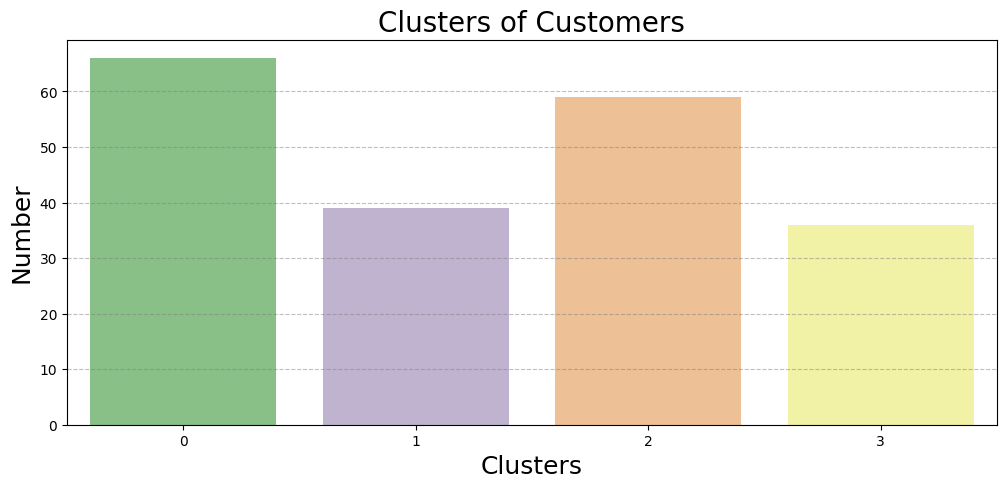

In [24]:
# View clusters
plt.figure(figsize=(12, 5))

data = df["cluster"].value_counts()

sns.barplot(x=data.index, y=data.values, palette=colors)
plt.title("Clusters of Customers", size=20)
plt.xlabel("Clusters", size=18)
plt.ylabel("Number", size=18)
plt.grid(True, axis="y", alpha=0.5, linestyle="--", color="gray")
plt.show()


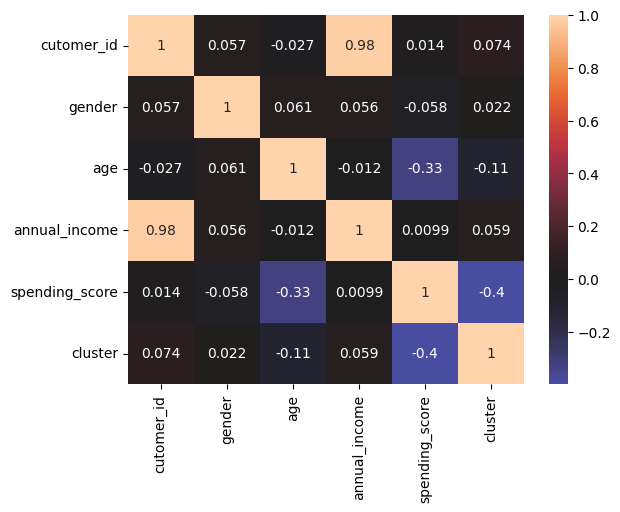

In [26]:
# Plot heat map
sns.heatmap(df.corr(), annot=True, center=0);

- We can see that, there is a linear relation between `age`, `spending_score` and the `cluster`
- While there is no other relation with other variables and the clusters

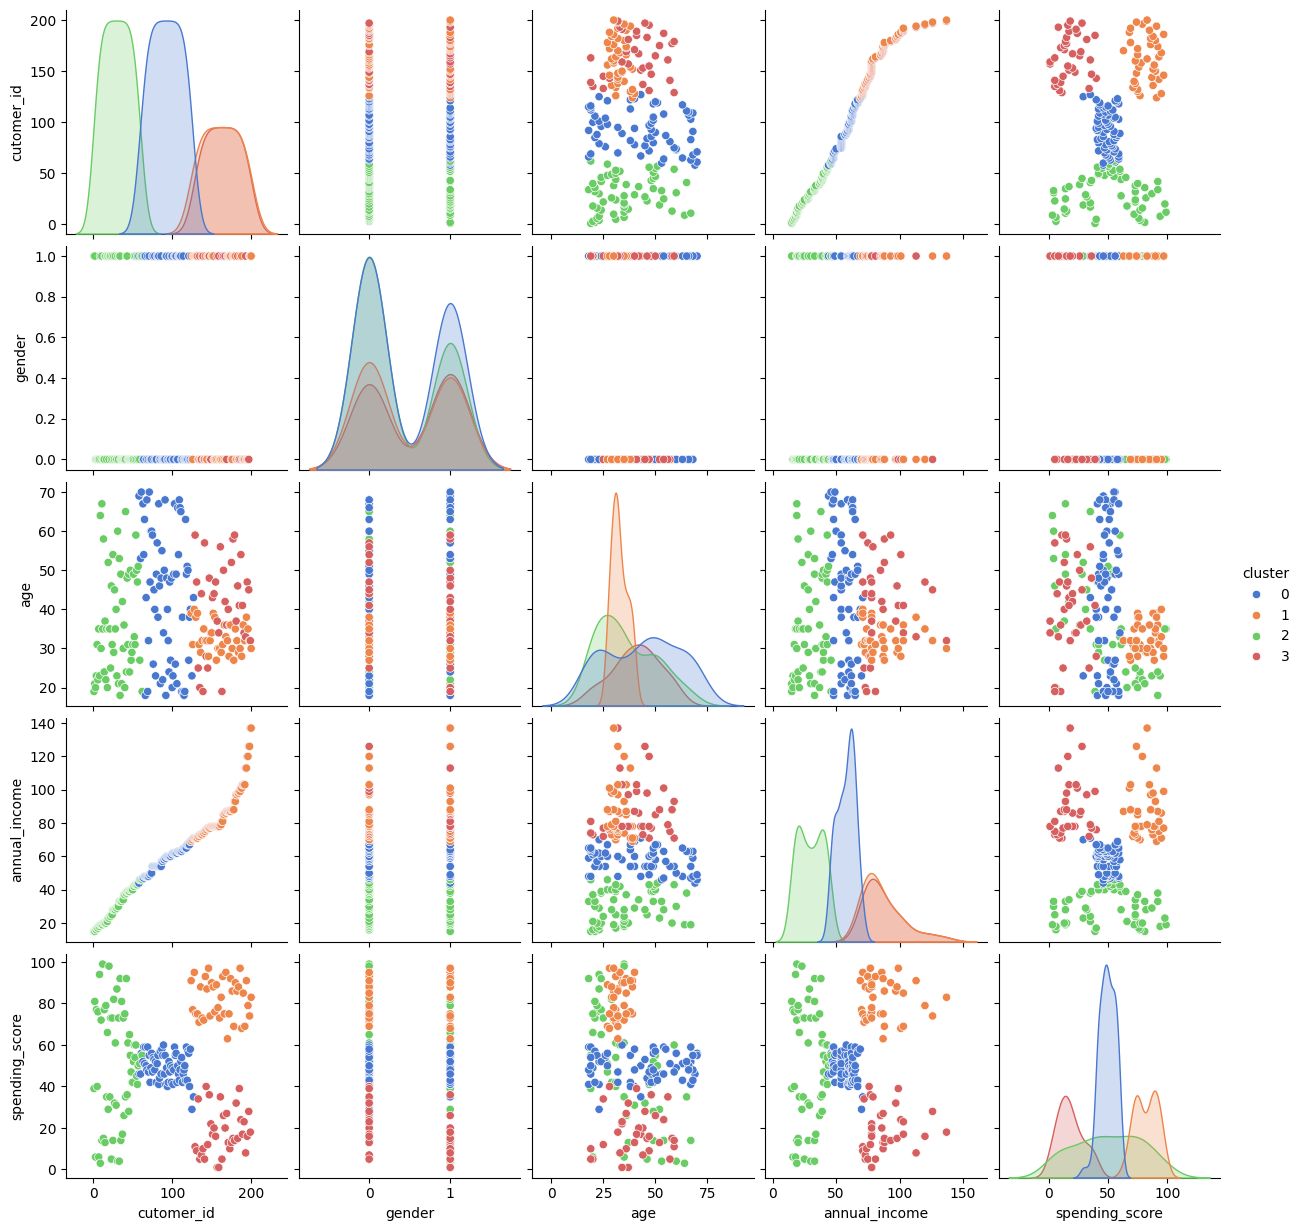

In [31]:
sns.pairplot(df, hue="cluster", palette="muted");

- Clusters have a strong relation with `annual income` **(Clsuter(2): Is mainly with lower income, Cluster(0): Is mainly with medium income,**    
**clusters(1, 3): Both has high income)**
- Clusters has a strong relation with `spending score` **(Cluster(2): Varies in score, Cluster(0): Has medium score, Cluster(1): Has high score,**   
**Cluster(3): Has low score)**
- Clusters has a good relation with `age` as **(Clsuer(1): Has an age range from 25 to 50, but other clusters vary in age)**

So we can say that the **better cluster is (1)** as it has higher spending score, and it has the followin:    
- High annual income
- Ages ranging between 25 - 50

## Characteristics of group 1 that has the highest spending score
- **`Age:`**   
    - Ranges from 27 to 40
    - Mean is 32
    - Median is 32
    - Normaly distriputed

- **`Annual Income (unit in 1000 USD):`**   
    - Ranges from 69 - 137
    - Mean is 86
    - Median is 79
    - Slight right skewd

In [32]:
# Create a supset of the data
cluster_1_df = df[df["cluster"] == 1]

In [39]:
cluster_1_df[cluster_1_df.columns[1:-1]].describe()

,gender,age,annual_income,spending_score
count,39.000000,39.000000,39.000000,39.000000
mean,0.461538,32.692308,86.538462,82.128205
std,0.505035,3.728650,16.312485,9.364489
min,0.000000,27.000000,69.000000,63.000000
25%,0.000000,30.000000,75.500000,74.500000
50%,0.000000,32.000000,79.000000,83.000000
75%,1.000000,35.500000,95.000000,90.000000
max,1.000000,40.000000,137.000000,97.000000


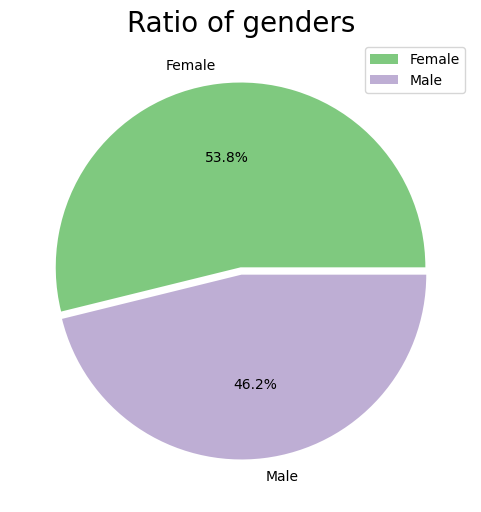

In [50]:
plt.figure(figsize=(6, 6))

data = cluster_1_df["gender"].value_counts()
labels = ["Female", "Male"]
plt.pie(x=data, labels=labels, autopct="%1.1f%%", explode=[0.02, 0.02], colors=colors)

plt.title("Ratio of genders", size=20)
plt.legend()
plt.show()